 Let us import the necessary libraries

In [ ]:
# !pip install yfinance
# !pip install pandas-datareader
!pip install tabulate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas_datareader --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf


In [ ]:
stock = '^BSESN'
endDate = "2020-12-31"
startDate = "2020-01-01"

df = yf.download(stock, start=startDate, end=endDate)
df = df[['Close']]
df['returns']= df.Close.pct_change()
print(df['returns'])

[*********************100%***********************]  1 of 1 completed
Date
2020-01-02         NaN
2020-01-03   -0.003892
2020-01-06   -0.019004
2020-01-07    0.004741
2020-01-08   -0.001266
                ...   
2020-12-23    0.009509
2020-12-24    0.011398
2020-12-28    0.008094
2020-12-29    0.005476
2020-12-30    0.002796
Name: returns, Length: 248, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


 Determine the mean and standard deviation of the daily returns. Plot the normal curve against the daily returns

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tabulate import tabulate

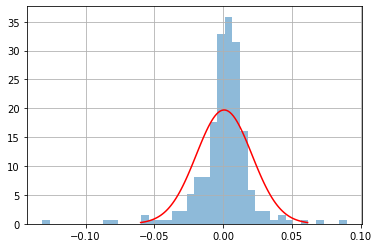

In [ ]:
mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])

df['returns'].hist(bins=40,density=True,histtype='stepfilled',alpha=0.5)
x=np.linspace(mean- 3*std_dev,mean + 3*std_dev,100)
plt.plot(x,norm.pdf(x,mean,std_dev),"r")

Calculate the VaR using point percentile function

In [ ]:
vaR_90 = norm.pdf(1-0.9,mean,std_dev)
vaR_95 = norm.pdf(1-0.95,mean,std_dev)
vaR_99 = norm.pdf(1-0.99,mean,std_dev)

print(tabulate([['90%',vaR_90],['95%',vaR_95],['99%',vaR_99]],headers=['confidence level','value at Risk']))


confidence level      value at Risk
------------------  ---------------
90%                     0.000117995
95%                     1.02122
99%                    17.7657


VaR Calculation using the Historical Simulation approach


Calculate the daily returns

[*********************100%***********************]  1 of 1 completed


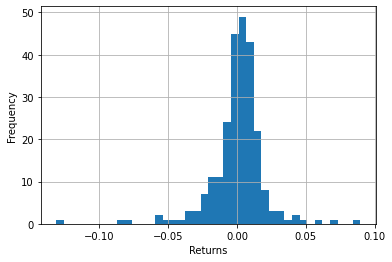

In [ ]:
stock = '^BSESN'
endDate = "2020-12-31"
startDate = "2020-01-01"

df = yf.download(stock, start=startDate, end=endDate)
df['returns']= df.Close.pct_change()
df= df.dropna()
plt.hist(df.returns,bins=40)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Sort the returns

In [ ]:
df.sort_values('returns',inplace=True,ascending=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Calculate the VaR for 90%, 95%, and 99% confidence levels using quantile function



In [ ]:
import numpy as np

vaR_90 =df['returns'].quantile(0.1)
vaR_95 =df['returns'].quantile(0.05)
vaR_99 =df['returns'].quantile(0.01)

print(tabulate([['90%',vaR_90],['95%',vaR_95],['99%',vaR_99]],headers=['confidence level','value at Risk']))

# var_95= np.percentile(df['returns'],5)
# print(var_95)



confidence level      value at Risk
------------------  ---------------
90%                      -0.0184039
95%                      -0.0290183
99%                      -0.070281


Parametric VaR


In [ ]:
stock = '^BSESN'
endDate = "2020-12-31"
startDate = "2020-01-01"

df = yf.download(stock, start=startDate, end=endDate)
df = df[['Close']]
df['returns']= df.Close.pct_change()
df= df.dropna()

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# import numpy as np
# from scipy.stats import norm
# from tabulate import tabulate



mean = np.mean(df['returns'])
std = np.std(df['returns'])

# Z_99 = norm.ppf(1-0.99)
# price = df.iloc[-1]['Close']
# print(mean, std, Z_99, price)

In [ ]:
# ParamVAR = price*Z_99*std
# HistVAR = price*np.percentile(df.dropna(), 1)

# VaR = norm.ppf(1-alpha/100)*portfolioStd - portofolioReturns

# var_99 = norm.ppf(0.01,mean,std)
vaR_90 =norm.ppf(0.1,mean,std)
vaR_95 =norm.ppf(0.05,mean,std)
vaR_99 = norm.ppf(0.01,mean,std)

print(tabulate([['90%',vaR_90],['95%',vaR_95],['99%',vaR_99]],headers=['confidence level','value at Risk']))


# print('Parametric VAR is {0:.3f} and Historical VAR is {1:.3f}'
#       .format(ParamVAR, HistVAR))

confidence level      value at Risk
------------------  ---------------
90%                      -0.025167
95%                      -0.0325181
99%                      -0.0463076


Calculating Var and Expected shortfall for each month at convidence interval 90,95 and 99


In [ ]:
# preprocessing the data

# # df=data[(data['Date'] >= '01/01/2020') & (data['Date'] <= '12/31/2020')].sort_values("Date")
# df.rename(columns={'Close':'close'}, inplace=True)
# df["close"] = df["close"].str.replace(r',', '', regex=True)
# df["close"]=df["close"].astype(float)
# # print(df.head())
# ###############
# df['return']=df.close.pct_change()
# # df.sort_values("return", inplace=True)
# # define a new list which ignore the first (index 0) NAN value
# # return_list1=df['return'].tolist()[1:]
# # return_list=df['return'].dropna()
# #########################
# # print(df.head())
# ####################################
# print(df)


In [ ]:
df

,Close,returns
Date,,
2020-01-03,41464.609375,-0.003892
2020-01-06,40676.628906,-0.019004
2020-01-07,40869.468750,0.004741
2020-01-08,40817.738281,-0.001266
2020-01-09,41452.351562,0.015547
...,...,...
2020-12-23,46444.179688,0.009509
2020-12-24,46973.539062,0.011398
2020-12-28,47353.750000,0.008094


In [ ]:
df=df.reset_index()

In [ ]:
import datetime
import pandas as pd

In [ ]:

# data["Date"] = datetime.datetime.strptime(data["Date"], "%Y-%m-%d")

df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['month'] = df['Date'].dt.month

In [ ]:
df.head()

,Date,Close,returns,month
0,2020-01-03,41464.609375,-0.003892,1
1,2020-01-06,40676.628906,-0.019004,1
2,2020-01-07,40869.468750,0.004741,1
3,2020-01-08,40817.738281,-0.001266,1
4,2020-01-09,41452.351562,0.015547,1


In [ ]:
df_jan=df[(df['month']==1)].dropna()
# print(df_jan)
jan=df_jan['returns']

df_feb=df[(df['month']==2)].dropna()
# print(df_january)
feb=df_feb['returns']

df_mar=df[(df['month']==3)].dropna()
# print(df_january)
mar=df_mar['returns']

df_apr=df[(df['month']==4)].dropna()
# print(df_january)
apr=df_apr['returns']

df_may=df[(df['month']==5)].dropna()
# print(df_january)
may=df_may['returns']

df_jun=df[(df['month']==6)].dropna()
# print(df_january)
jun=df_jun['returns']

df_jul=df[(df['month']==7)].dropna()
# print(df_january)
jul=df_jul['returns']

df_aug=df[(df['month']==8)].dropna()
# print(df_january)
aug=df_aug['returns']

df_sep=df[(df['month']==9)].dropna()
# print(df_january)
sep=df_sep['returns']

df_oct=df[(df['month']==10)].dropna()
# print(df_january)
oct=df_oct['returns']


df_nov=df[(df['month']==11)].dropna()
# print(df_january)
nov=df_nov['returns']

df_dec=df[(df['month']==12)].dropna()
# print(df_january)
dec=df_dec['returns']



In [ ]:
def value_at_risk(returns, confidence_level):
    """
    Compute the Value-at-Risk metric of returns at confidence_level
    :param returns: DataFrame
    :param confidence_level: float
    :return: float
    """

    # Calculate the highest return in the lowest quantile (based on confidence level)
    var = returns.quantile(q=confidence_level, interpolation="higher")
    return var

def expected_shortfall(returns, confidence_level):
    """
    Compute the Value-at-Risk metric of returns at confidence_level
    :param returns: DataFrame
    :param confidence_level: float
    :return: float
    """

    # Calculate the VaR of the returns
    var = value_at_risk(returns, confidence_level)
    # Find all returns in the worst quantitle
    worst_returns = returns[returns.lt(var)]
    # Calculate mean of all the worst returns
    es = worst_returns.mean()

    return es

In [ ]:
# Var and shortfall  at 90 convidence interval for January
print("This is value at risk at 90 convidence interval: ", value_at_risk(jan,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(jan,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(jan,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(jan,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(jan,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(jan,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.0062493849492673
This is the shortfall at 90% convidence interval :  -0.0027631736712266128
This is value at risk at 95 % convidence interval:  0.006591682685643585
This is the shortfall at 95 % convidence interval :  -0.0022888284806743017
This is value at risk at 99 % convidence interval:  0.015547487635823254
This is the shortfall at 99 % convidence interval :  -0.0018448029223584073


In [ ]:
# Var and shortfall  at 90 convidence interval for febuary
print("This is value at risk at 90 convidence interval: ", value_at_risk(feb,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(feb,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(feb,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(feb,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(feb,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(feb,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.010481173824221868
This is the shortfall at 90% convidence interval :  -0.005487305415060817
This is value at risk at 95 % convidence interval:  0.023000180948733684
This is the shortfall at 95 % convidence interval :  -0.0046001676795451125
This is value at risk at 99 % convidence interval:  0.023000180948733684
This is the shortfall at 99 % convidence interval :  -0.0046001676795451125


In [ ]:
# Var and shortfall  at 90 convidence interval for March
print("This is value at risk at 90 convidence interval: ", value_at_risk(mar,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(mar,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(mar,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(mar,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(mar,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(mar,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.04944635363539973
This is the shortfall at 90% convidence interval :  -0.022807785599777492
This is value at risk at 95 % convidence interval:  0.05754090806592349
This is the shortfall at 95 % convidence interval :  -0.019004936166347113
This is value at risk at 99 % convidence interval:  0.06979635432199638
This is the shortfall at 99 % convidence interval :  -0.015177643954733583


In [ ]:
# Var and shortfall  at 90 convidence interval for April
print("This is value at risk at 90 convidence interval: ", value_at_risk(apr,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(apr,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(apr,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(apr,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(apr,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(apr,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.04233825707376626
This is the shortfall at 90% convidence interval :  0.0006880388479969871
This is value at risk at 95 % convidence interval:  0.08974905861764282
This is the shortfall at 95 % convidence interval :  0.0031380516848069444
This is value at risk at 99 % convidence interval:  0.08974905861764282
This is the shortfall at 99 % convidence interval :  0.0031380516848069444


In [ ]:
# Var and shortfall  at 90 convidence interval for May
print("This is value at risk at 90 convidence interval: ", value_at_risk(may,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(may,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(may,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(may,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(may,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(may,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.020613192160972904
This is the shortfall at 90% convidence interval :  -0.005183189905193012
This is value at risk at 95 % convidence interval:  0.032536513296803626
This is the shortfall at 95 % convidence interval :  -0.0037500575681837945
This is value at risk at 99 % convidence interval:  0.032536513296803626
This is the shortfall at 99 % convidence interval :  -0.0037500575681837945


In [ ]:
# Var and shortfall  at 90 convidence interval for June
print("This is value at risk at 90 convidence interval: ", value_at_risk(jun,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(jun,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(jun,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(jun,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(jun,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(jun,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.015674370940289784
This is the shortfall at 90% convidence interval :  0.0006376086127964569
This is value at risk at 95 % convidence interval:  0.020894429349029853
This is the shortfall at 95 % convidence interval :  0.0013894467291711231
This is value at risk at 99 % convidence interval:  0.02712241611855659
This is the shortfall at 99 % convidence interval :  0.0023182554253548724


In [ ]:
# Var and shortfall  at 90 convidence interval for July
print("This is value at risk at 90 convidence interval: ", value_at_risk(jul,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(jul,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(jul,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(jul,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(jul,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(jul,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.014281454995807463
This is the shortfall at 90% convidence interval :  0.001567977492324063
This is value at risk at 95 % convidence interval:  0.01471524228858967
This is the shortfall at 95 % convidence interval :  0.0021733811829661295
This is value at risk at 99 % convidence interval:  0.015037995019680395
This is the shortfall at 99 % convidence interval :  0.0027434657786762906


In [ ]:
# Var and shortfall  at 90 convidence interval for August
print("This is value at risk at 90 convidence interval: ", value_at_risk(aug,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(aug,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(aug,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(aug,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(aug,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(aug,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.009614686534024974
This is the shortfall at 90% convidence interval :  -0.0008130052355864108
This is value at risk at 95 % convidence interval:  0.01255004619648914
This is the shortfall at 95 % convidence interval :  -0.0002641793529752853
This is value at risk at 99 % convidence interval:  0.020257624936314
This is the shortfall at 99 % convidence interval :  0.00037653192449793593


In [ ]:
# Var and shortfall  at 90 convidence interval for September
print("This is value at risk at 90 convidence interval: ", value_at_risk(sep,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(sep,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(sep,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(sep,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(sep,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(sep,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.01585958810831789
This is the shortfall at 90% convidence interval :  -0.0036177298227338247
This is value at risk at 95 % convidence interval:  0.01692411791634063
This is the shortfall at 95 % convidence interval :  -0.002643863926181239
This is value at risk at 99 % convidence interval:  0.02284476927183765
This is the shortfall at 99 % convidence interval :  -0.001712055267013531


In [ ]:
# Var and shortfall  at 90 convidence interval for October
print("This is value at risk at 90 convidence interval: ", value_at_risk(oct,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(oct,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(oct,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(oct,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(oct,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(oct,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.011220301450529213
This is the shortfall at 90% convidence interval :  -0.0001254866701443554
This is value at risk at 95 % convidence interval:  0.015417348257794394
This is the shortfall at 95 % convidence interval :  0.0004716600730489903
This is value at risk at 99 % convidence interval:  0.01652627550051866
This is the shortfall at 99 % convidence interval :  0.0012189444822862604


In [ ]:
# Var and shortfall  at 90 convidence interval for November
print("This is value at risk at 90 convidence interval: ", value_at_risk(nov,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(nov,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(nov,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(nov,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(nov,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(nov,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.016813551394766924
This is the shortfall at 90% convidence interval :  0.004403929447876369
This is value at risk at 95 % convidence interval:  0.017825906649642453
This is the shortfall at 95 % convidence interval :  0.005093352889370289
This is value at risk at 99 % convidence interval:  0.017825906649642453
This is the shortfall at 99 % convidence interval :  0.005093352889370289


In [ ]:
# Var and shortfall  at 90 convidence interval for December
print("This is value at risk at 90 convidence interval: ", value_at_risk(dec,confidence_level=0.9))
print("This is the shortfall at 90% convidence interval : ", expected_shortfall(dec,confidence_level=0.9))
# Var and shortfall  at 95 convidence interval
print("This is value at risk at 95 % convidence interval: ", value_at_risk(dec,confidence_level=0.95))
print("This is the shortfall at 95 % convidence interval : ", expected_shortfall(dec,confidence_level=0.95))
# Var and shortfall  at 99 % convidence interval
print("This is value at risk at 99 % convidence interval: ", value_at_risk(dec,confidence_level=0.99))
print("This is the shortfall at 99 % convidence interval : ", expected_shortfall(dec,confidence_level=0.99))

This is value at risk at 90 convidence interval:  0.010852980345037455
This is the shortfall at 90% convidence interval :  0.002530683001120514
This is value at risk at 95 % convidence interval:  0.011397754865341447
This is the shortfall at 95 % convidence interval :  0.002968698650800353
This is value at risk at 99 % convidence interval:  0.011454719771006427
This is the shortfall at 99 % convidence interval :  0.0033901514615274075
